# Gradient

In [1]:
!jt -t chesterish

In [2]:
!jt -r

Reset css and font defaults in:
C:\Users\PF\.jupyter\custom &
C:\Users\PF\AppData\Roaming\jupyter\nbextensions


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()  # white plots :)

import time

In [4]:
def x_square_diff(x):
    return 2 * x


def x_square(x):
    return x ** 2


def difference_quotient(func, x, h):
    return (func(x + h) - func(x)) / h


def h_exp_generator(exponent_start: int, exponent_end: int,
                    interval: int = 1):
    exp = exponent_start
    while exponent_start <= exp <= exponent_end:
        yield 10 ** exp, exp
        exp += interval
        
def h_exp_generator_dims(exponent_start: int, exponent_end: int,
            interval: int = 1, dimensions: int = 2):
    exp = exponent_start
    while exponent_start <= exp <= exponent_end:
        yield [10 ** exp] * dimensions, exp
        exp += interval

        
def h_generator(exponent_start: int, exponent_end: int):
    exp = exponent_start
    while exponent_start <= exp <= exponent_end:
        yield 10 ** exp, exp
        exp += 1

'Time elapsed: 0.010367899999977226'

,h,gradient_res,error,error_abs,error_squared,exp
125,0.00000003162277660169,9.99999999159002861404,-0.00000000840997138596,0.00000000840997138596,0.00000000000000007073,-7.49999999999997513100
121,0.00000001258925411794,9.99999997276079177766,-0.00000002723920822234,0.00000002723920822234,0.00000000000000074197,-7.89999999999997370992
111,0.00000000125892541179,9.99999997276071006524,-0.00000002723928993476,0.00000002723928993476,0.00000000000000074198,-8.89999999999997015721
124,0.00000002511886431510,10.00000007341928487392,0.00000007341928487392,0.00000007341928487392,0.00000000000000539039,-7.59999999999997477573
127,0.00000005011872336273,10.00000007705853555251,0.00000007705853555251,0.00000007705853555251,0.00000000000000593802,-7.29999999999997584155
...,...,...,...,...,...,...
28,0.00000000000000000631,0.00000000000000000000,-10.00000000000000000000,10.00000000000000000000,100.00000000000000000000,-17.19999999999996020961
26,0.00000000000000000398,0.00000000000000000000,-10.00000000000000000000,10.00000000000000000000,100.00000000000000000000,-17.39999999999996305178
25,0.00000000000000000316,0.00000000000000000000,-10.00000000000000000000,10.00000000000000000000,100.00000000000000000000,-17.49999999999996447286
23,0.00000000000000000200,0.00000000000000000000,-10.00000000000000000000,10.00000000000000000000,100.00000000000000000000,-17.69999999999996731503


c:\users\pf\appdata\local\conda\conda\envs\tf_2_0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'error_abs vs h comparison - one dimension')

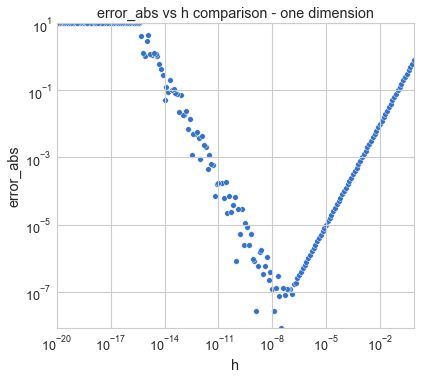

In [5]:


x = 5
h_exp_start = -20
h_exp_end = 0
pd.set_option("display.precision", 20)

start = time.perf_counter ()

data = list(dict())
for h, exp in h_exp_generator(h_exp_start, h_exp_end, 0.1):
    approx_res = difference_quotient(x_square, x, h)
    real_res = x_square_diff(x)
    error = approx_res - real_res
    data.append({'h': h, 'gradient_res': approx_res,
                 'error': error,
                 'error_abs': abs(error),
                 'error_squared': error ** 2,
                 'exp': exp})
df = pd.DataFrame(data)

end = time.perf_counter ()
display(f"Time elapsed: {end - start}")

# FAR SLOWER!!! ~100x slower!!!
# start = time.perf_counter ()

# df = pd.DataFrame(columns=['h', 'gradient_res', 'error'])
# for idx, h in enumerate(h_generator(h_exp_start, h_exp_end)):
#     approx_res = difference_quotient(x_square, x, h)
#     real_res = x_square_diff(x)
#     df.loc[idx] = [h, approx_res, approx_res - real_res]

# end = time.perf_counter()
# display(f"Time elapsed: {end - start}")


df_sorted = df.sort_values(by=['error_abs'])
max_index = len(df)
display(df_sorted.iloc[:max_index])
sp = sns.scatterplot(df_sorted.iloc[:max_index]['h'],
                     df_sorted.iloc[:max_index]['error_abs'])

sp.axes.set_xlim(min(df_sorted['h']), max(df_sorted['h']))
sp.axes.set_xscale('log')

sp.axes.set_ylim(min(df_sorted['error_abs']), 
                 max(df_sorted['error_abs']))
sp.axes.set_yscale('log')
sp.axes.set_title('error_abs vs h comparison - one dimension')

In [6]:
def step(x, direction, step_size):
    return direction * step_size        

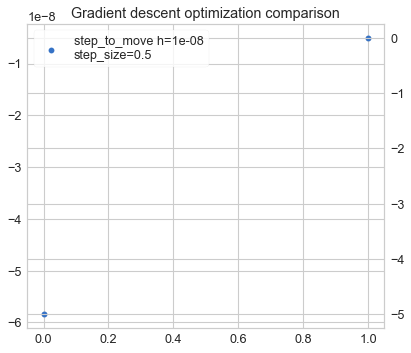

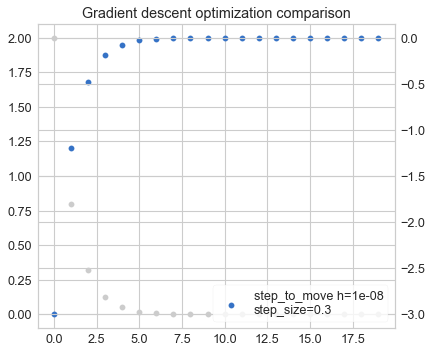

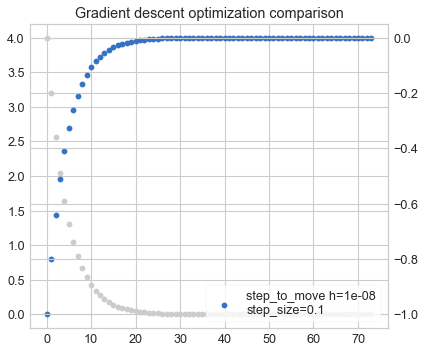

'Time elapsed: 0.9341987999999901'

In [7]:
x_0_start = 5
step_to_move = float('inf')
eps = 1e-7

h_exp_start = -8
h_exp_end = -8
# pd.set_option("display.precision", 20)

iter_cnt = 0
max_iter = 100

start = time.perf_counter()

data = list(dict())
for h, exp in h_exp_generator(h_exp_start, h_exp_end, 1):
    for step_size in [0.5, 0.3, 0.1]:
        x_0 = x_0_start
        iter_cnt = 0
        step_to_move = float('inf')
        while abs(step_to_move) > eps and iter_cnt < max_iter:
            approx_gradient = difference_quotient(x_square, x_0, h)
    #         display(f"Approx_gradient: {-approx_gradient}")
            real_gradient = x_square_diff(x_0)
            error = approx_gradient - real_gradient
            step_to_move = step(x_0, -approx_gradient, step_size)
    #         display(f"Step:{step_to_move}")
            x = x_0 + step_to_move
    #         display(f"x after step:{x}")
            data.append({'h': h, 
                         'x_current': x_0,
                         'x_next': x,
                         'gradient_res': approx_gradient,
                         'step_to_move': step_to_move,
                         'step_size': step_size,
                         'error': error,
                         'error_abs': abs(error),
                         'error_squared': error ** 2,
                         'iteration': iter_cnt,
                         'exp': exp})
            x_0 = x
            iter_cnt += 1

df = pd.DataFrame(data)
step_sizes_list = df.step_size.unique()
h_list = df.h.unique()

for h in h_list:
    for step_size in step_sizes_list:
#         sp = sns.scatterplot(df.loc[(df['h'] == h) 
#                         & (df['step_size'] == step_size)]['iteration'],
#                         df.loc[(df['h'] == h) 
#                         & (df['step_size'] == step_size)]['x_next'],
#                         label=f"x_next h={h}\nstep_size={step_size}", color=".8")
        sp = plt.scatter(df.loc[(df['h'] == h) 
                        & (df['step_size'] == step_size)]['iteration'],
                        df.loc[(df['h'] == h) 
                        & (df['step_size'] == step_size)]['x_next'],
                        label=f"x_next h={h}\nstep_size={step_size}", color=".8")
        plt.twinx()
#         sp.twinx()
#         sp = sns.scatterplot(df.loc[(df['h'] == h) 
#                         & (df['step_size'] == step_size)]['iteration'],
#                         df.loc[(df['h'] == h) 
#                         & (df['step_size'] == step_size)]['step_to_move'],
#                         label=f"step_to_move h={h}\nstep_size={step_size}")
        sp = plt.scatter(df.loc[(df['h'] == h) 
                        & (df['step_size'] == step_size)]['iteration'],
                        df.loc[(df['h'] == h) 
                        & (df['step_size'] == step_size)]['step_to_move'],
                        label=f"step_to_move h={h}\nstep_size={step_size}")
        sp.axes.set_title("Gradient descent optimization comparison")
        plt.legend()
#         sp.legend()
        plt.show()

end = time.perf_counter()
display(f"Time elapsed: {end - start}")

In [8]:
from scipy.special import j1


def difference_quotient_dims(func, x, h):
    result = list()
    for idx in range(len(x)):
        h_vector = np.zeros(len(x))
        h_vector[idx] = h[idx]
        result.append((func(x + h_vector) - func(x)) / h[idx])
    return np.array(result)


def sombrero(x):
    arg = sum(x ** 2)
    return j1(arg) / arg


def square_x_y(x):
    return (x[0]+7) ** 2 + (x[1]-12) ** 2

'Optimization result: [3.79049558 1.8952478 ]'

'Optimization result: [3.79049658 1.8952483 ]'

c:\users\pf\appdata\local\conda\conda\envs\tf_2_0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pf\appdata\local\conda\conda\envs\tf_2_0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


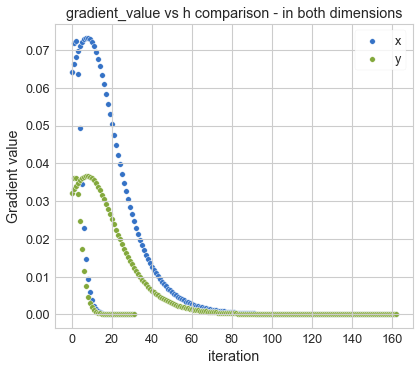

'Optimization result: [-7.00000001 11.99999999]'

'Optimization result: [-6.99999963 11.99999965]'

c:\users\pf\appdata\local\conda\conda\envs\tf_2_0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pf\appdata\local\conda\conda\envs\tf_2_0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


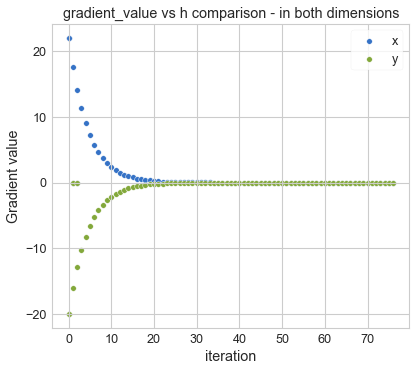

'Time elapsed: 0.4669724999999971'

In [9]:
def plot_gradient_comparison(df, dim='x'):
    sp = sns.scatterplot(df['iteration'],
                         df[f'gradient_res_{dim}'],
                         label=dim)
    sp.axes.set_ylabel('Gradient value')
    sp.axes.set_title(f"gradient_value vs h comparison - in both dimensions")

    
pd.set_option("display.precision", 20)

x_0_start = np.asarray([4, 2])
eps = 1e-7
max_iter = 500

start = time.perf_counter ()
for func in [sombrero, square_x_y]:
    data = list(dict())
    for h, exp in h_exp_generator_dims(-8, -8, 1):
        for step_size in [0.5, 0.1]:
            x_0 = x_0_start
            iter_cnt = 0
            step_to_move = np.array([float('inf'), float('inf')])
            while any(abs(step_to_move) > eps) \
                  and iter_cnt < max_iter:
                approx_gradient = difference_quotient_dims(func, x_0, h)
                step_to_move = step(x_0, -approx_gradient, step_size)
                x = x_0 + step_to_move
                data.append({'h': h, 
                             'x_current': x_0,
                             'x_next': x,
                             'gradient_res_x': approx_gradient[0],
                             'gradient_res_y': approx_gradient[1],
                             'step_to_move': step_to_move,
                             'step_size': step_size,
                             'error': error,
                             'error_abs': abs(error),
                             'error_squared': error ** 2,
                             'iteration': iter_cnt,
                             'exp': exp})
                x_0 = x
                iter_cnt += 1

            display(f"Optimization result: {x}")

    df = pd.DataFrame(data)
    
    plot_gradient_comparison(df, 'x')
    plot_gradient_comparison(df, 'y')
    plt.show()
    # plot_gradient_comparison(df.loc[df['step_size'] == 0.5], 'x')
    # plot_gradient_comparison(df.loc[df['step_size'] == 0.5], 'y')
                          
end = time.perf_counter ()
display(f"Time elapsed: {end - start}")

In [10]:
start = time.perf_counter() 
for i in range(1000000):
    l = list(map(abs, step_to_move)) 
stop = time.perf_counter()
display(f"Time elapsed: {stop - start}")

start = time.perf_counter() 
for i in range(1000000):
    l = [abs(ele) for ele in step_to_move]
stop = time.perf_counter()
display(f"Time elapsed: {stop - start}")

'Time elapsed: 2.009948599999973'

'Time elapsed: 1.7101683000000207'

In [16]:
any([abs(sub_ele) < eps for ele in step_to_move for sub_ele in ele ])

TypeError: 'numpy.float64' object is not iterable